In [1]:
import torch, torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = self.layer1 = torch.nn.Linear(784, 10)
        
    def forward(self, x):
        x = self.layer1(x)
        return x
        
net = OneLayerNetwork().cuda()

mnist = torchvision.datasets.MNIST('.', train=True, download=True, transform=torchvision.transforms.ToTensor())
train_dataloader = torch.utils.data.DataLoader(mnist, batch_size=32, shuffle=True)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()


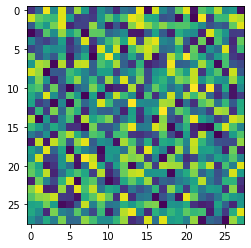

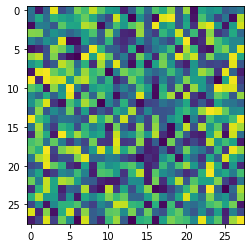

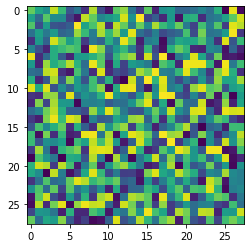

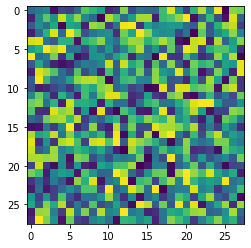

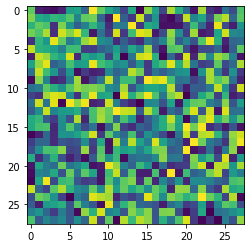

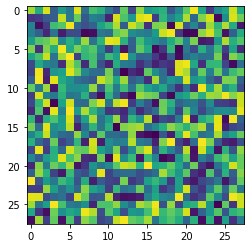

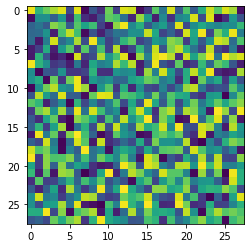

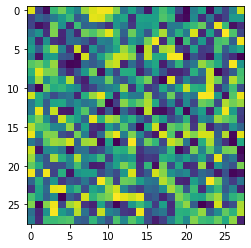

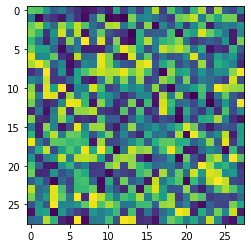

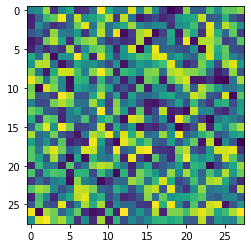

In [3]:
#Weights visualization before training
for n in range(10):
    class_weights = net.layer1.weight[n].reshape(28, 28)
    plt.imshow(class_weights.detach().cpu().numpy()); plt.show()

In [4]:

for train_images, train_labels in train_dataloader:
    train_images, train_labels = train_images.cuda(), train_labels.cuda()
    flat_images = train_images.reshape(-1, 784)
    
    class_scores = net(flat_images)
    
    loss = loss_fn(class_scores, train_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
     

    

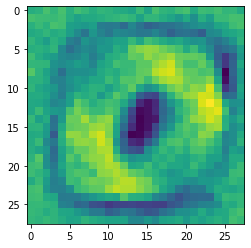

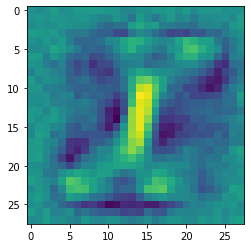

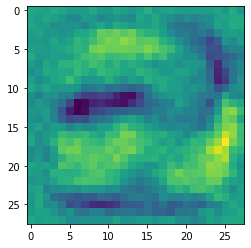

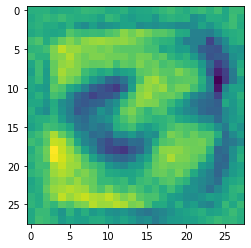

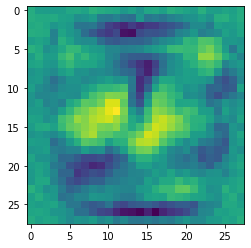

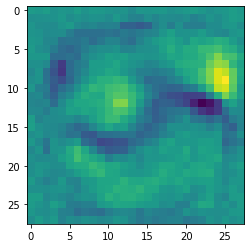

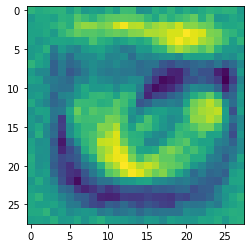

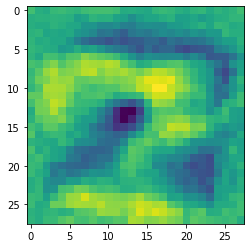

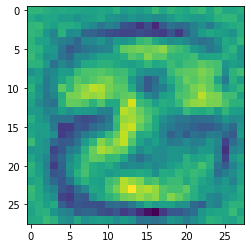

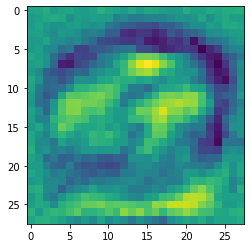

In [5]:
#Weights visualization after training
for n in range(10):
    class_weights = net.layer1.weight[n].reshape(28, 28)
    plt.imshow(class_weights.detach().cpu().numpy()); plt.show()